# Subpopulations Meta-Learning Distributions

In [1]:
import sys
from os import makedirs
from os.path import join

import pandas as pd

sys.path.append('../')
from common import ALIASES, _filter_mset, plot_coocc, read_toml

In [2]:
config = read_toml('../config.toml')
metachest_dir = config['metachest_dir']
df = pd.read_csv(join(metachest_dir, 'metachest.csv'))

mclasses = {'mtrn': config['mtrn'], 'mval': config['mval'], 'mtst': config['mtst']}
mset_dfs = [_filter_mset(mset, mclasses, df)
            for mset in mclasses.keys()]

In [3]:
def age_mask(df, val):
    left, right = {
        'decade2': [10, 20],
        'decade3': [21, 30],
        'decade4': [31, 40],
        'decade5': [41, 50],
        'decade6': [51, 60],
        'decade7': [61, 70],
        'decade8': [71, 80],
    }[val]
    mask = df['age'].between(left, right, inclusive='both')
    return mask


def sex_mask(df, val):
    return df['sex'] == val[:1]


def view_mask(df, val):
    return df['view'] == val


subpops = [
    # name   val       mask
    ['age',  'decade2',   age_mask],
    ['age',  'decade3',   age_mask],
    ['age',  'decade4',   age_mask],
    ['age',  'decade5',   age_mask],
    ['age',  'decade6',   age_mask],
    ['age',  'decade7',   age_mask],
    ['age',  'decade8',   age_mask],
    ['sex',  'female', sex_mask],
    ['sex',  'male',   sex_mask],
    ['view', 'ap',     view_mask],
    ['view', 'pa',     view_mask]
]

distro_dir = join(metachest_dir, 'distro')
makedirs(distro_dir, exist_ok=True)

/data/datasets/metachest/distro/age_decade2.csv


/data/datasets/metachest/distro/age_decade3.csv


/data/datasets/metachest/distro/age_decade4.csv


/data/datasets/metachest/distro/age_decade5.csv


/data/datasets/metachest/distro/age_decade6.csv


/data/datasets/metachest/distro/age_decade7.csv


/data/datasets/metachest/distro/age_decade8.csv


/home/bere/projects/metachest-dev/notebooks/../common.py:215: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 5))


/data/datasets/metachest/distro/sex_female.csv


/data/datasets/metachest/distro/sex_male.csv


/data/datasets/metachest/distro/view_ap.csv


/data/datasets/metachest/distro/view_pa.csv


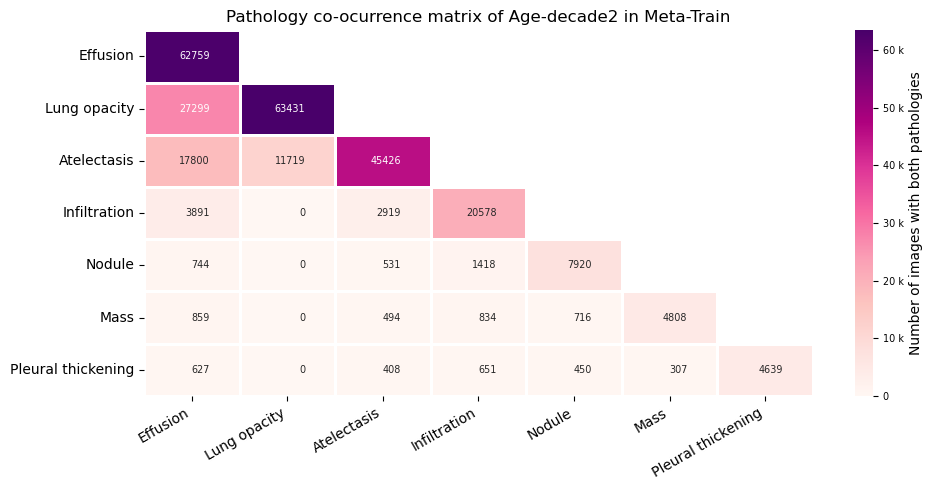

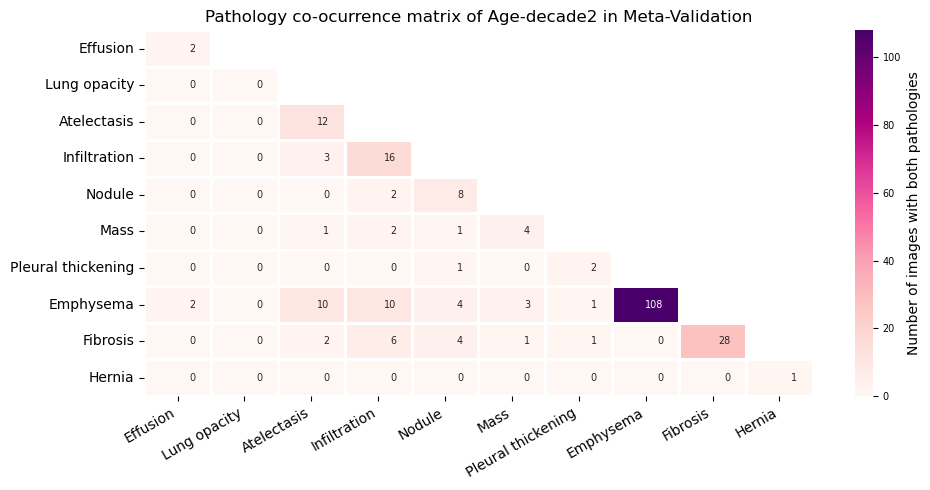

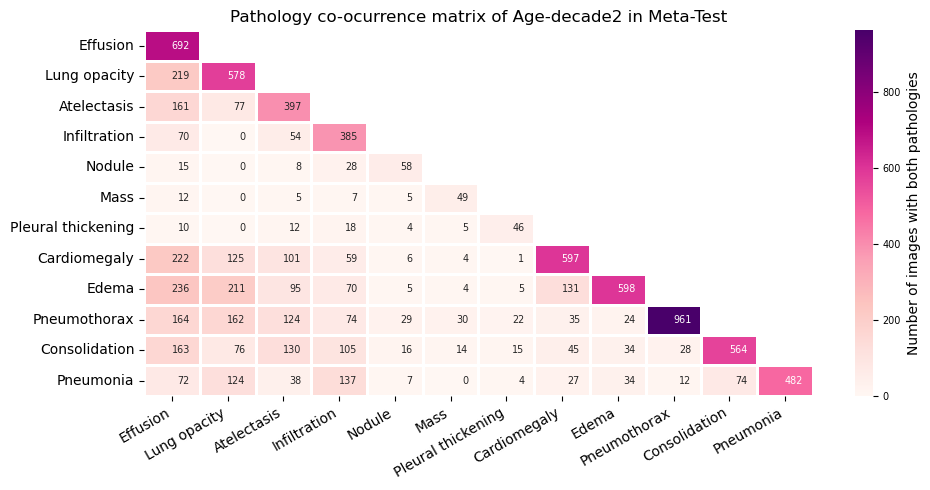

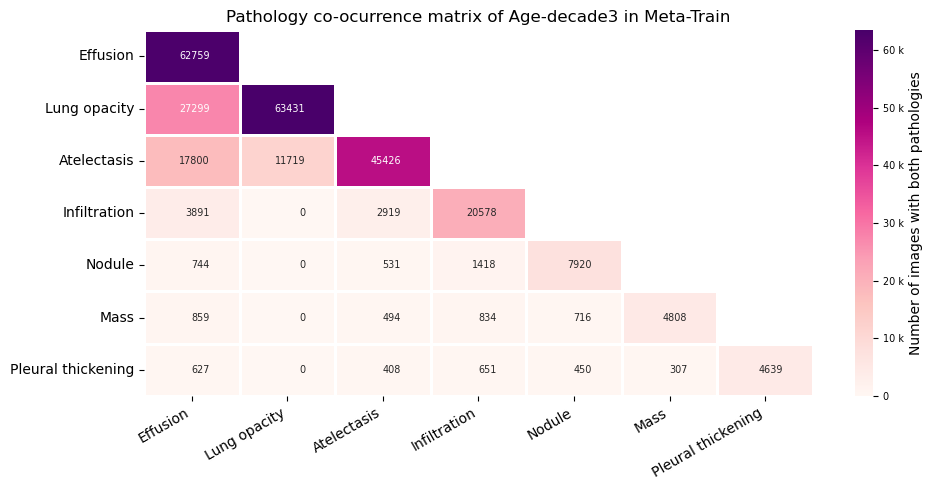

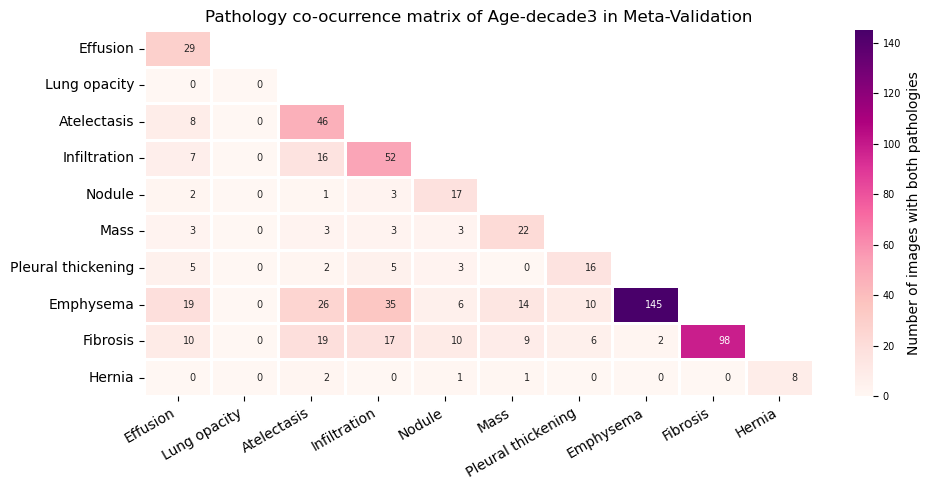

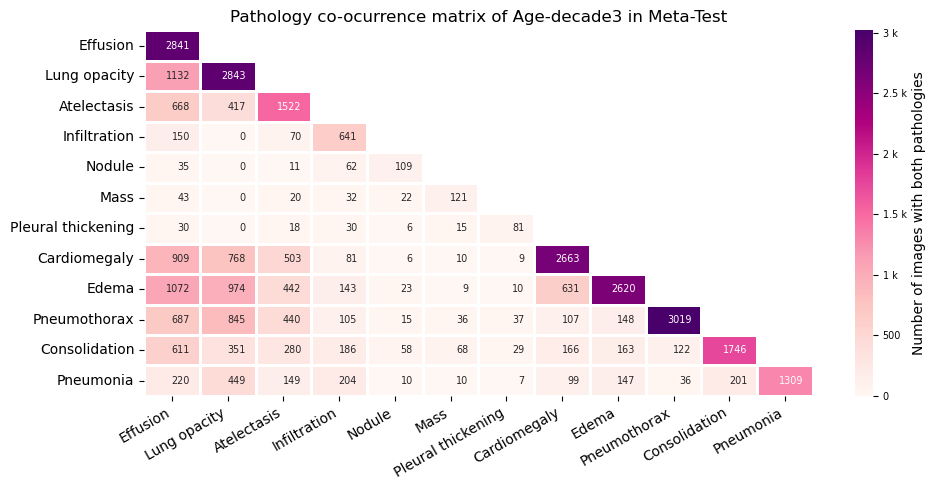

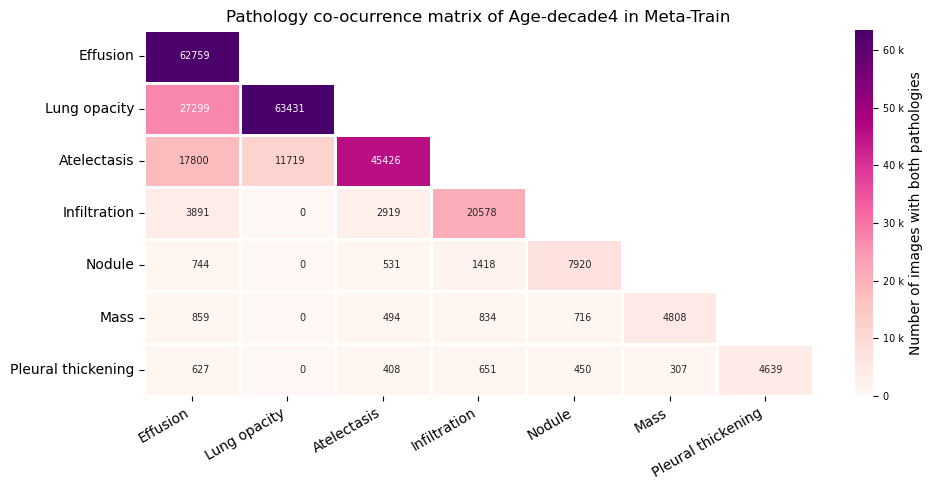

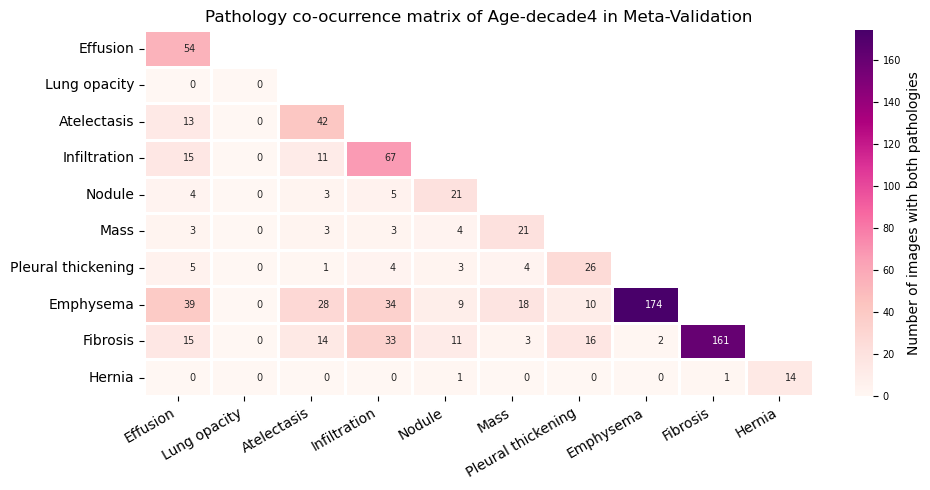

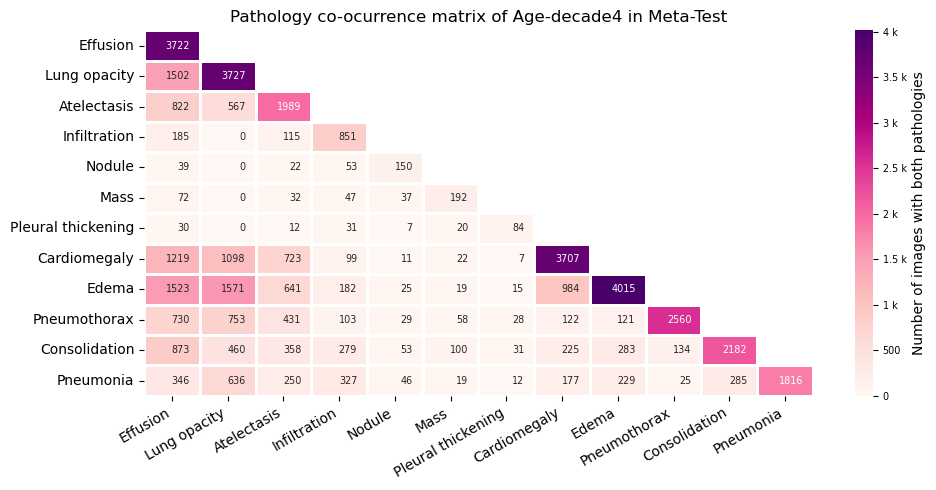

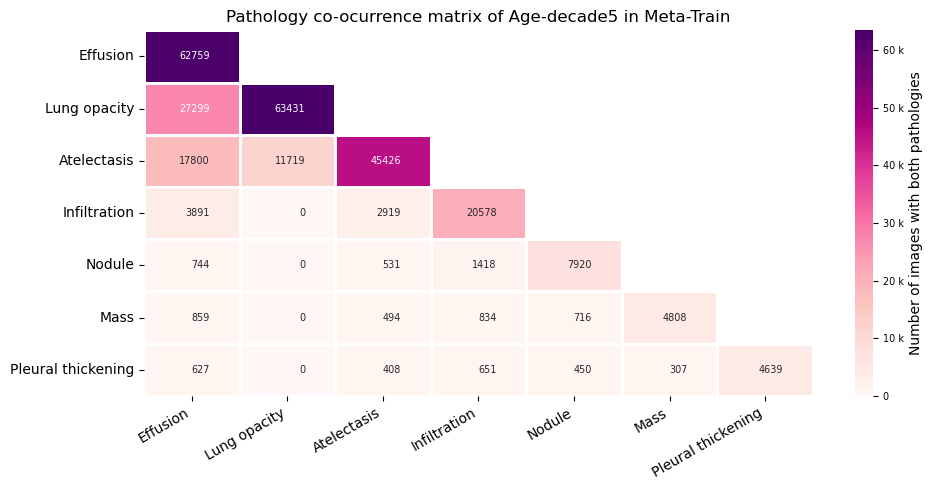

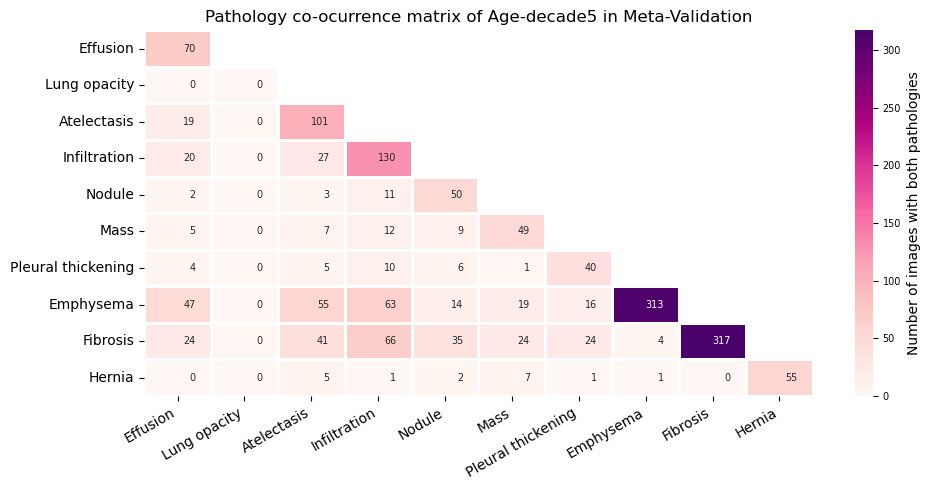

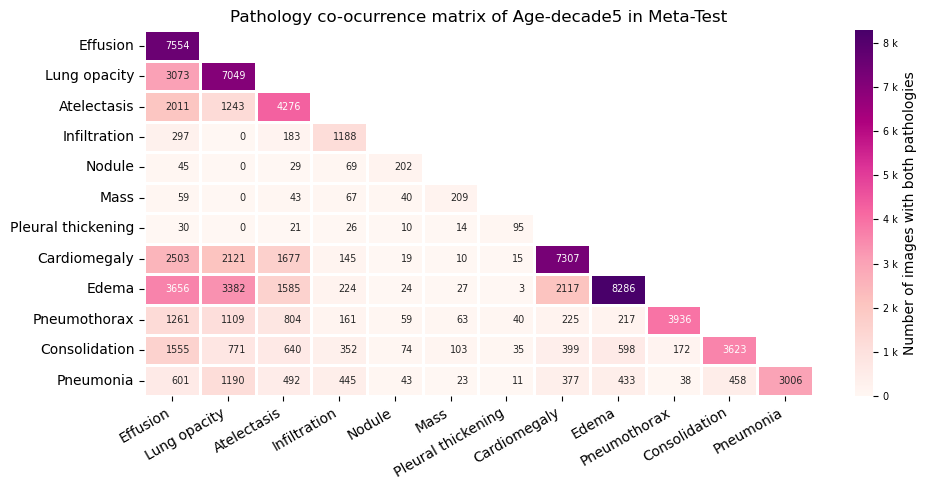

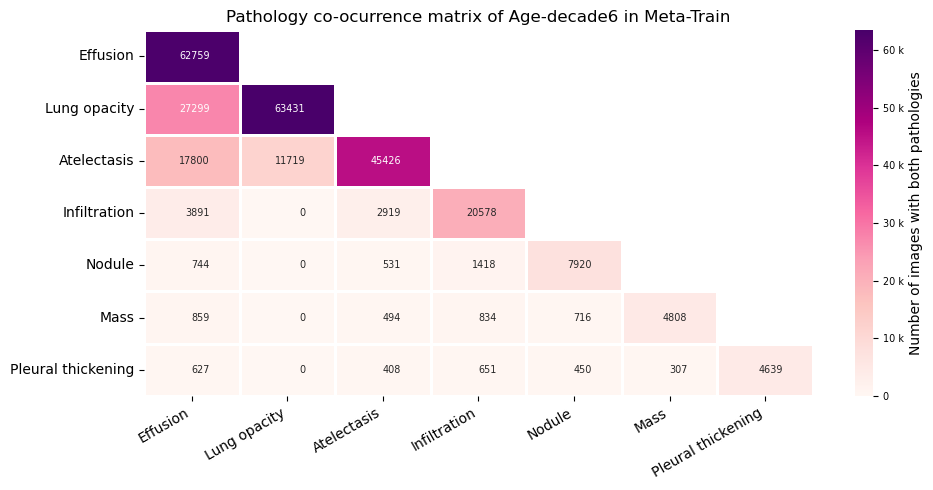

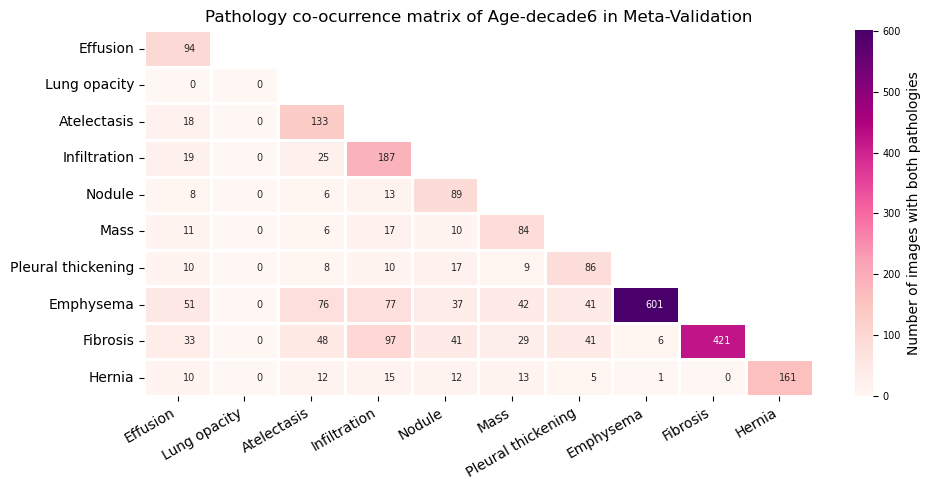

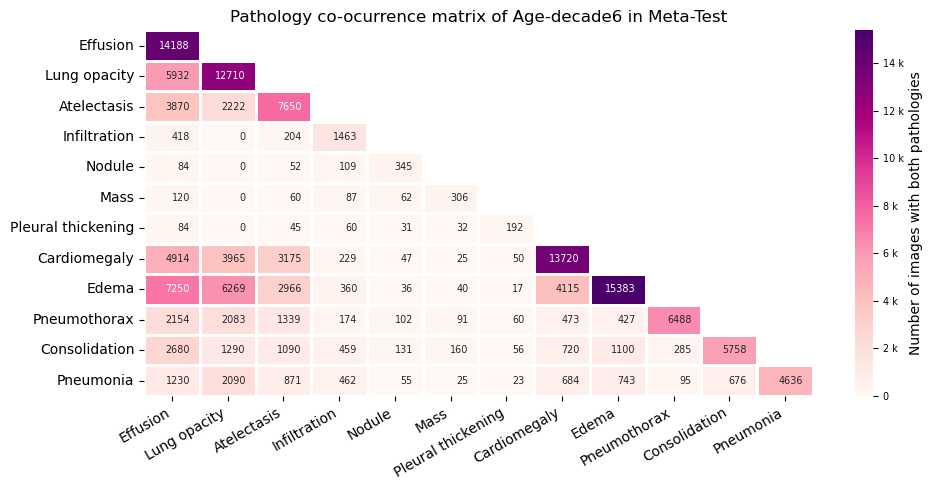

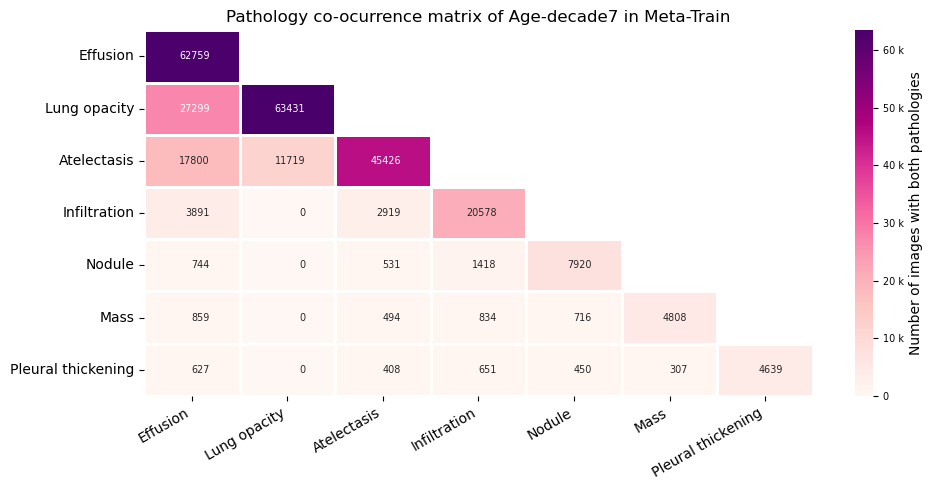

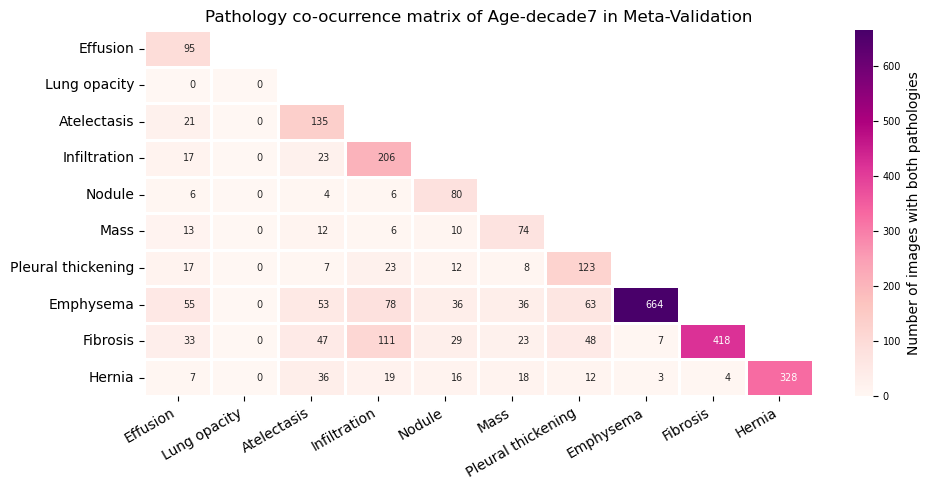

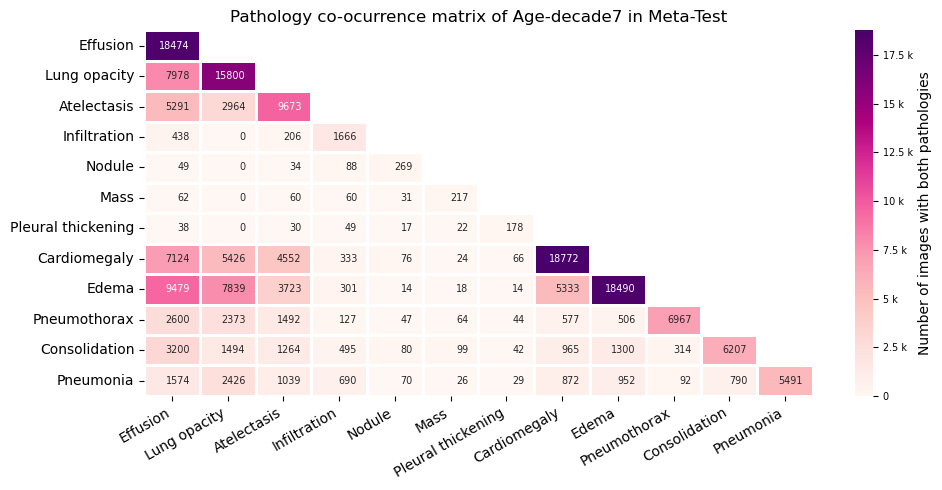

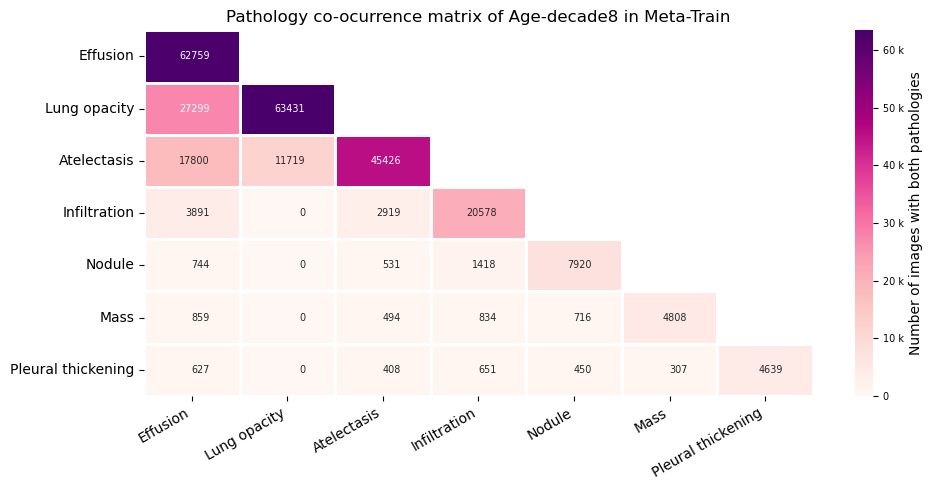

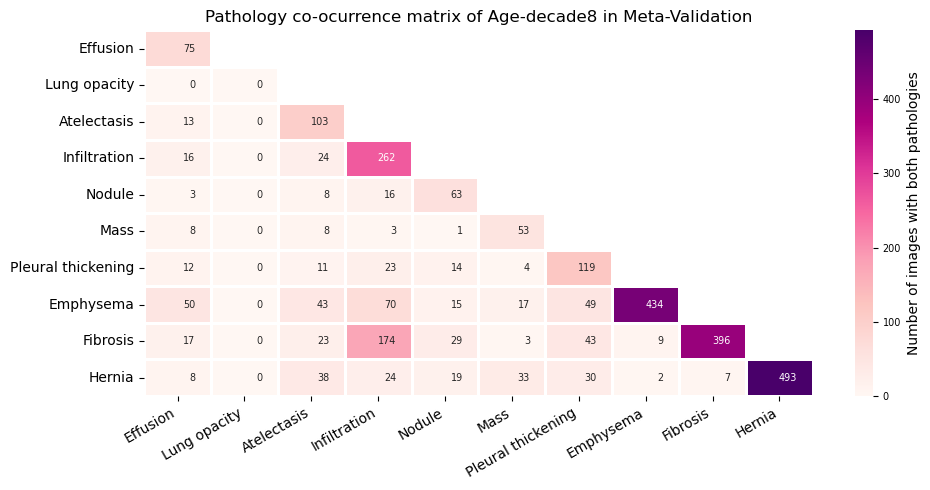

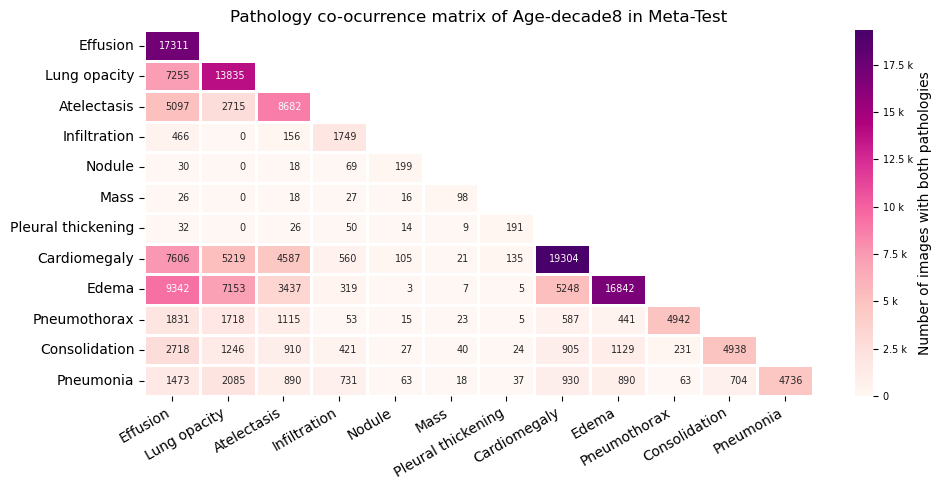

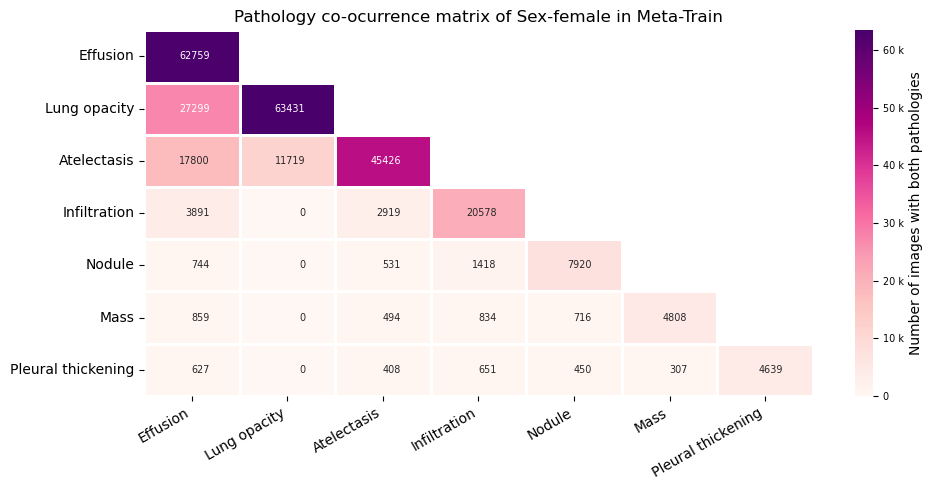

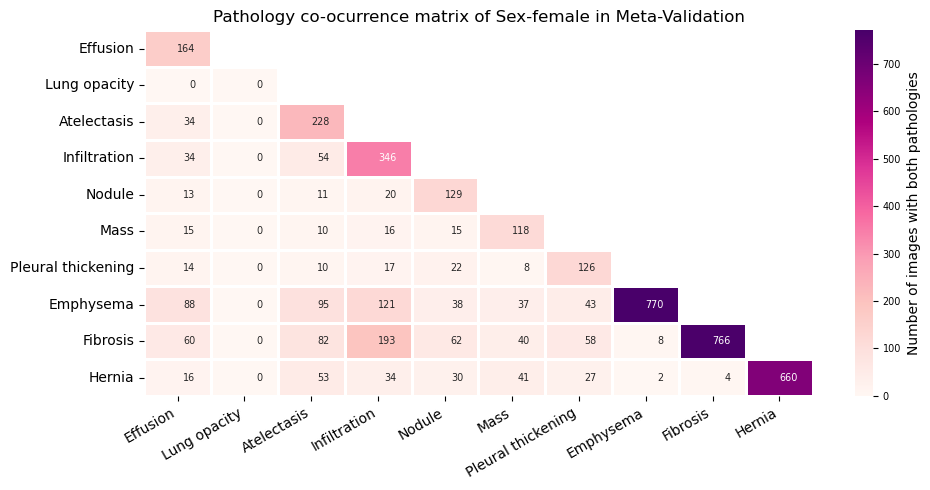

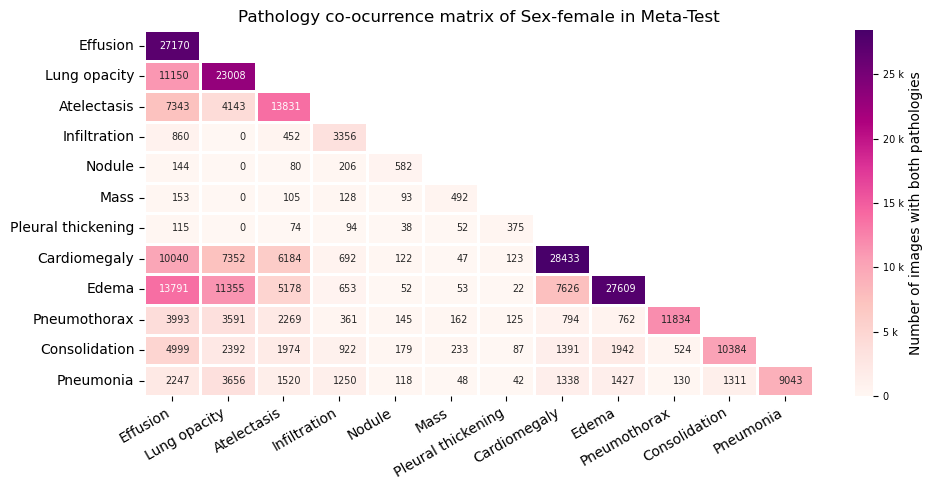

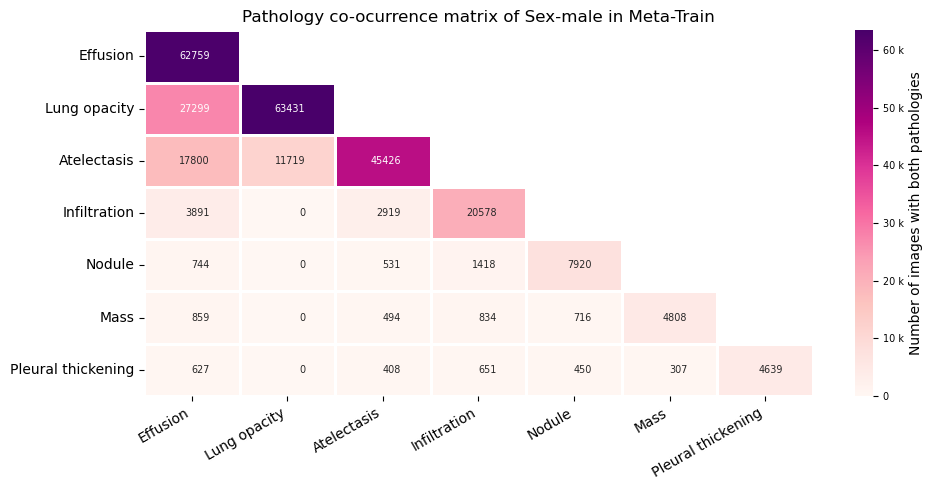

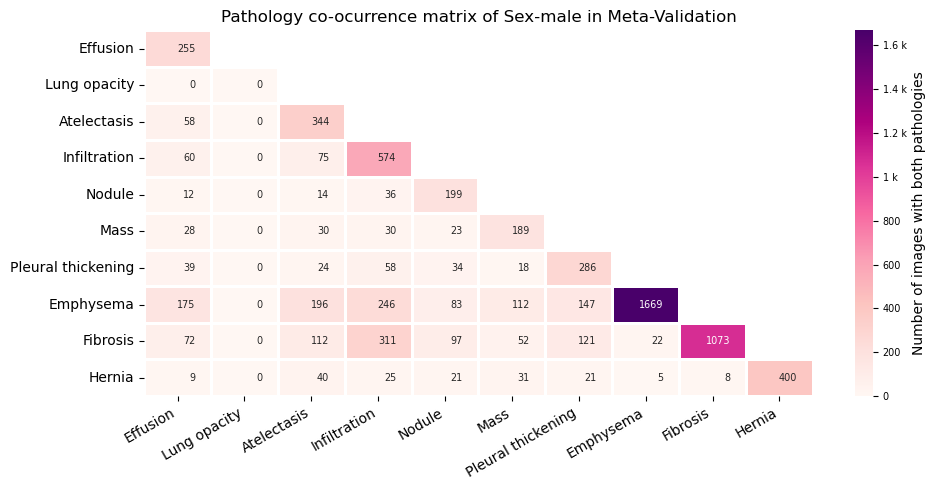

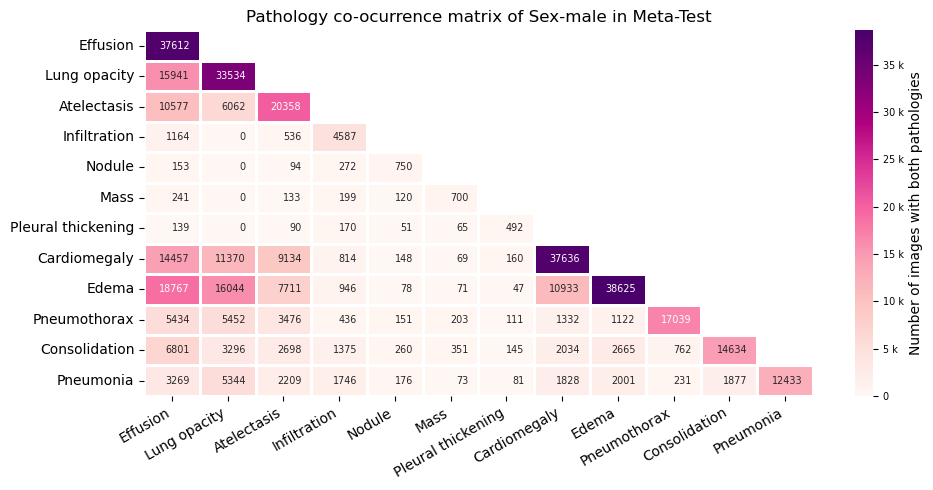

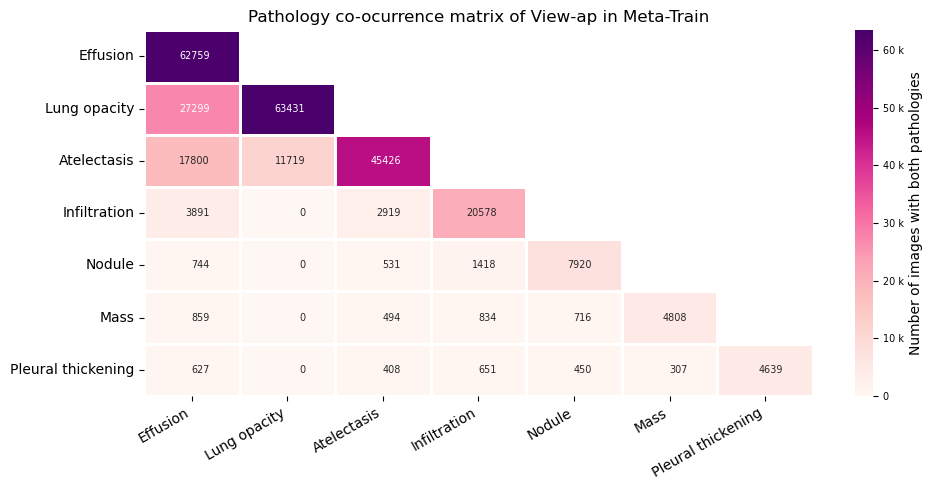

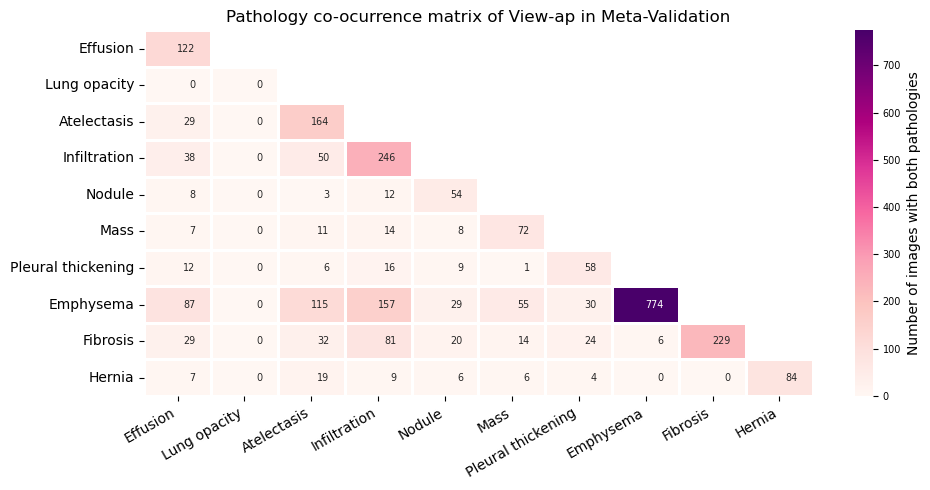

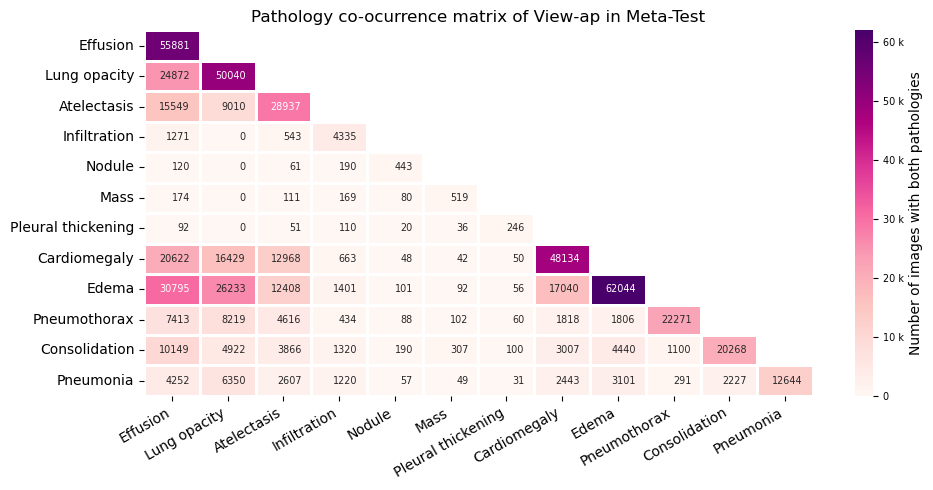

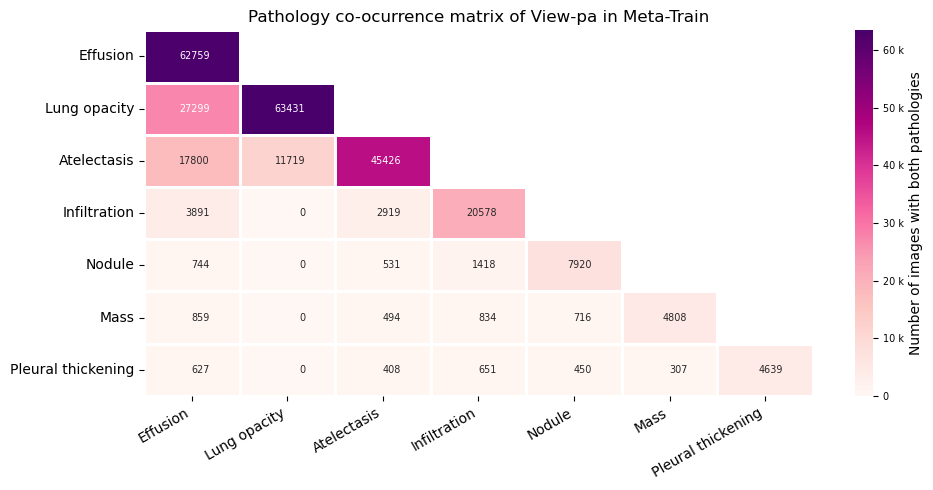

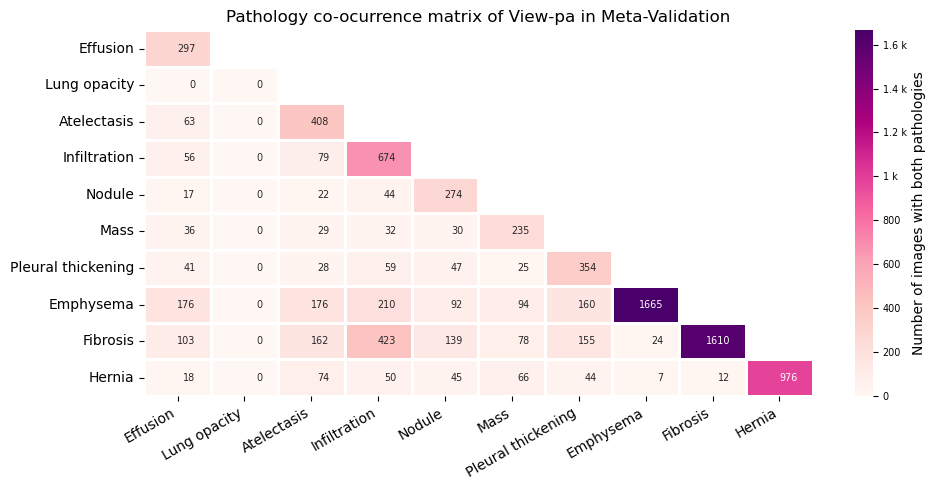

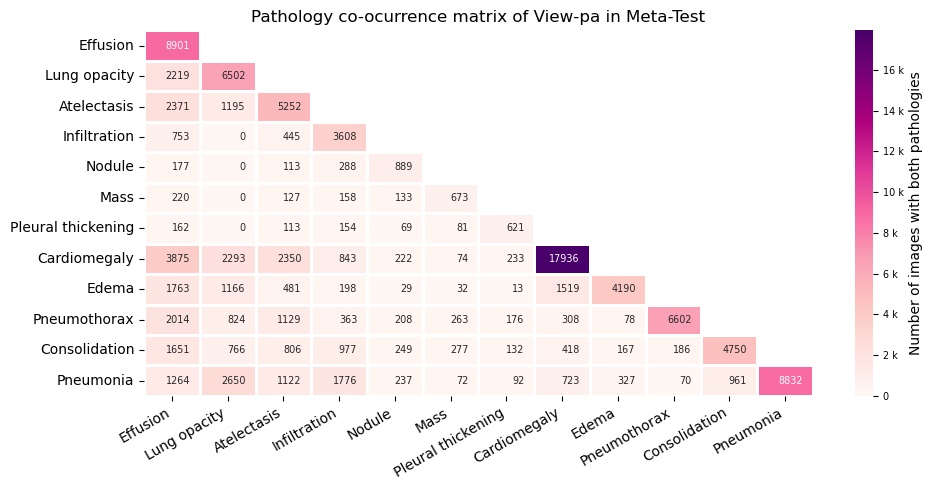

In [4]:
for name, val, fn_mask in subpops:
    mask = fn_mask(df, val)
    distro_df = pd.DataFrame({
        'mtrn': [1] * mask.shape[0],
        'mval': mask,
        'mtst': mask,
    }).astype(int)
    path = join(distro_dir, f'{name}_{val}.csv')
    distro_df.to_csv(path, index=False)
    print(path)

    dataset_title = f'{ALIASES[name]}-{val}'
    for mset, mset_df in zip(mclasses.keys(), mset_dfs):
        mask = distro_df[mset].astype(bool)
        ds_mset_df = mset_df.loc[mask]
        plot_coocc(dataset_title, mset, ds_mset_df.iloc[:, 5:])

### No-finding

In [5]:
nf_df = pd.read_csv(join(metachest_dir, 'metachest_nf.csv'))

for name, val, fn_mask in subpops:
    nf_distro = ( (nf_df.mset == 0) |
                 ((nf_df.mset == 1) & fn_mask(nf_df, val)) |
                 ((nf_df.mset == 2) & fn_mask(nf_df, val)))
    nf_distro = nf_distro.rename('mask').to_frame().astype(int)
    path = join(distro_dir, f'{name}_{val}_nf.csv')
    nf_distro.to_csv(path, index=False)
    print(path)

/data/datasets/metachest/distro/age_decade2_nf.csv
/data/datasets/metachest/distro/age_decade3_nf.csv
/data/datasets/metachest/distro/age_decade4_nf.csv
/data/datasets/metachest/distro/age_decade5_nf.csv
/data/datasets/metachest/distro/age_decade6_nf.csv
/data/datasets/metachest/distro/age_decade7_nf.csv
/data/datasets/metachest/distro/age_decade8_nf.csv


/data/datasets/metachest/distro/sex_female_nf.csv
/data/datasets/metachest/distro/sex_male_nf.csv
/data/datasets/metachest/distro/view_ap_nf.csv
/data/datasets/metachest/distro/view_pa_nf.csv
